# Example of using KF for Res file data visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from filterpy.kalman import predict
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise
from mpl_toolkits.mplot3d import Axes3D
from ResFunctions import *

import sys
sys.path.insert(1, './Kalman-and-Bayesian-Filters-in-Python/kf_book')
import book_plots as book_plots
from mkf_internal import plot_track
from filterpy.common import Saver

%matplotlib inline

/Users/tongqi/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


### Load raw data

In [2]:
example_res = pd.read_csv("../plotterfile/Res_08032022/220803175103_slowyes.Res", sep=" ",header=None)
dfs, tlen = getDFS_withrpt(df_raw=example_res)
# get data from channel C 
dfC = dfs[2]
tlen

[1261, 1261, 1261, 1261]

#### Get the variance for sensor's position data as measurement noise variance later in the KF model
#### usually use the no-motion data to get the measurement noise

In [5]:
dfC.var()

x              1.906059e+00
y              6.326537e+00
z              6.419370e+01
normal1        8.035856e-05
normal2        6.473298e-03
normal3        4.871892e-04
transverse1    6.251499e-05
transverse2    2.407827e-04
transverse3    6.864683e-03
status         3.737774e-02
cost_func      1.311786e+01
sw_counter     9.263353e+07
dtype: float64

### Draw xyz and cost function for all sensors

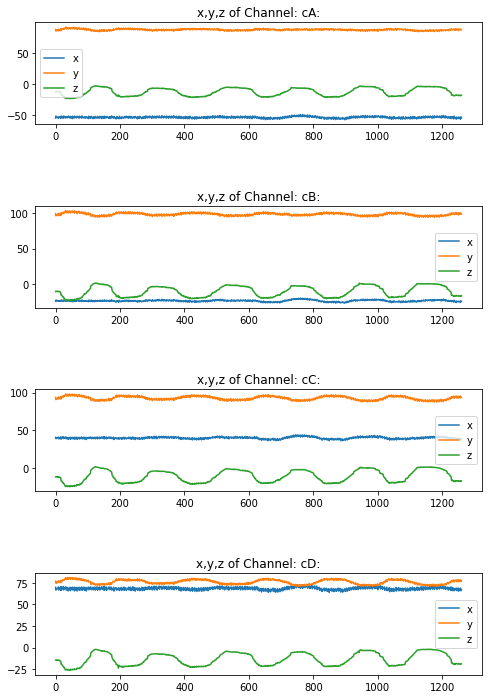

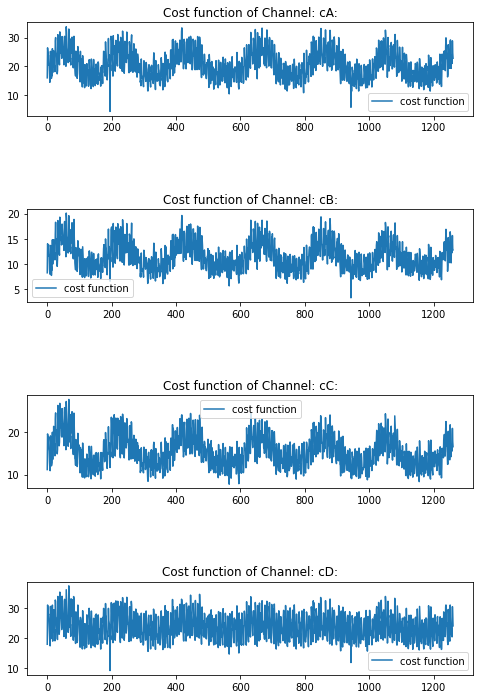

In [6]:
plotXYZ(dfs)
plotCF(dfs)

### Draw postions in 3D space

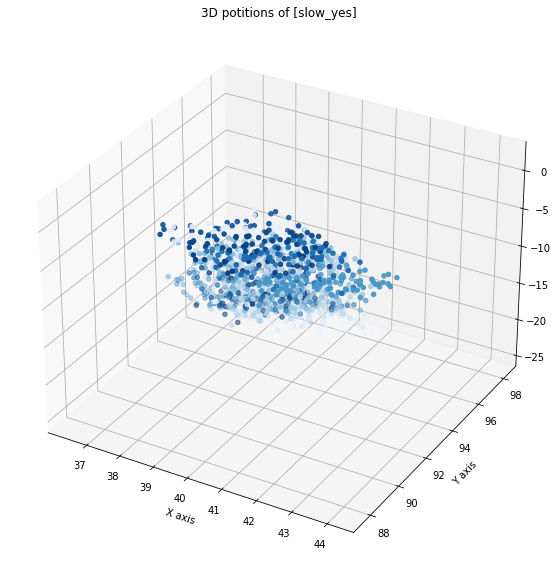

In [7]:
%matplotlib inline
# %matplotlib qt ## run this line to see float 3D plot. 
plot_xyz_in3D("slow_yes",dfC)

### Draw normal and transverse unit vectors in the same 3D space

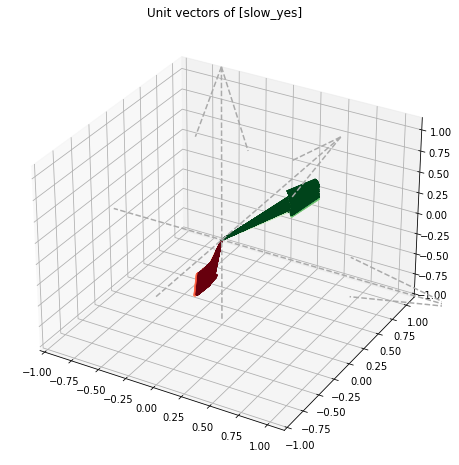

In [8]:
# get normals and transverse unit vectors
normals = dfC[['normal1','normal2','normal3']]
transverses = dfC[['transverse1','transverse2','transverse3']]
# plot normal and transverse orientation vectors in 3D
plot_normalstransverse("slow_yes",normals,transverses)

### Plot one of the unit vectors trajectory with points from light to dark color

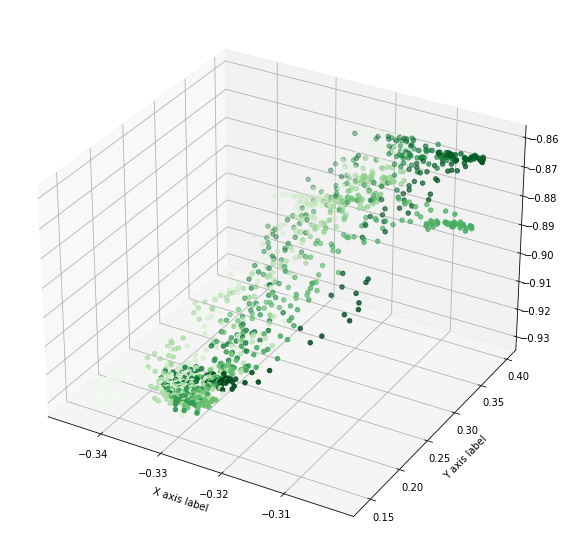

In [9]:
plot_unitvector_points(normals)

### Draw Orientation axes in polar coordinates for all sensors

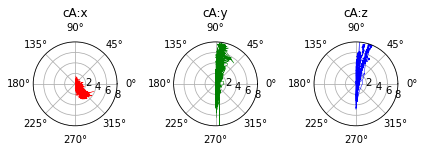

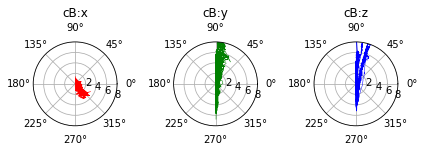

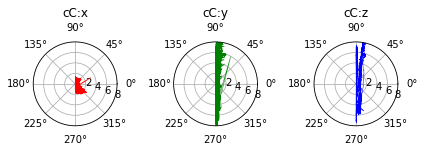

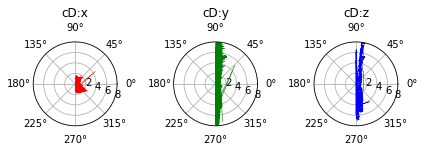

In [10]:
plotPolarOrientationAxe("slow_yes",dfs)

## Using the base vector method to calculate quaterions and plot

/Users/tongqi/Desktop/RobinMedical/git/ResFunctions.py:360: UserWarning: Optimal rotation is not uniquely or poorly defined for the given sets of vectors.
  r = R.align_vectors(vec2, vec1)


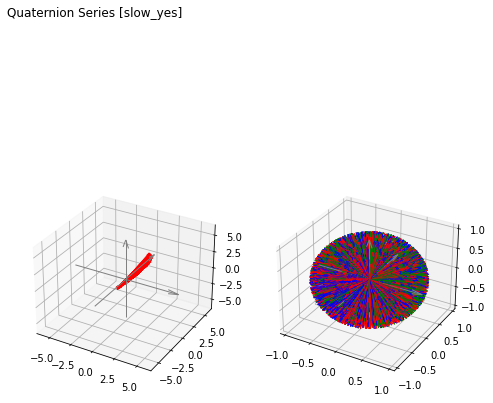

In [11]:
quatarray_basevector = get_allquaternions_from_unitvectors(normals, transverses)
plotQuaternionSeries("slow_yes",quatarray_basevector)

### - Calculate and plot angular velocities based on this method

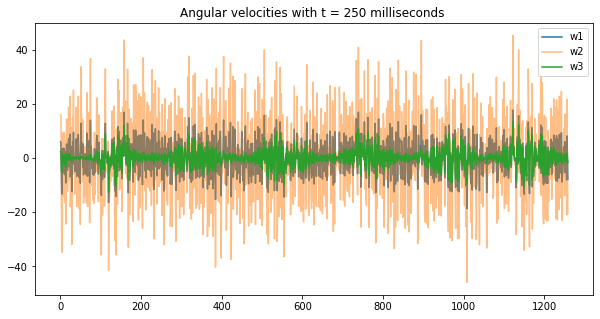

In [12]:
df_quats = get_quatDataFrame(quatarray_basevector)
# t has to be changed for sepecific case
t= np.array(range(0,len(df_quats)))
t=t.astype(float)*0.08 # /250 milliseconds
angvelocity = angular_velocity(df_quats, t)
plot_angular_velocity(angvelocity)

### - Calculate and plot euler angles based on this method

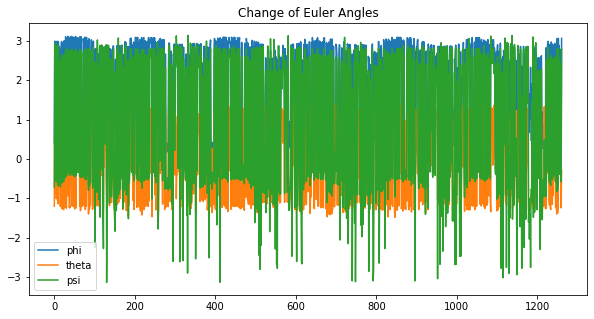

In [13]:
eulers = get_eulers_from_allquaterions(df_quats)
plot_eulers(eulers)

## Using positions only to calculate quaterions and plot

In [14]:
positions = dfC[['x','y','z']]
newts = positions.index.to_numpy()
positions = positions.to_numpy()
quatarray_pos = get_quaternion_fromposition(positions[1:,:], positions[:-1,:])
# or using the next line, they will get the same result
#quatarray_pos2 =computeRotationSeriesFromAllPositions(newts,positions)

/Users/tongqi/opt/anaconda3/lib/python3.8/site-packages/quaternion/__init__.py:105: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.asarray(a, dtype=np.double)


### - Calculate and plot angular velocities based on this method

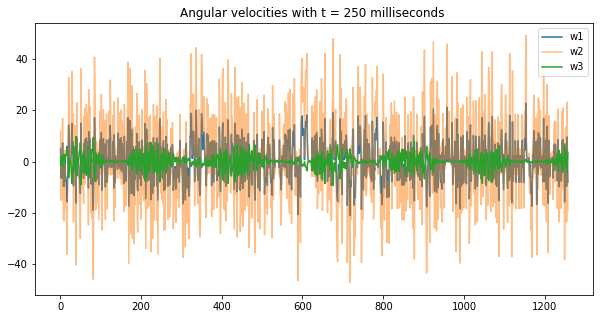

In [15]:
df_quats = get_quatDataFrame(quatarray_pos)
# t has to be changed for sepecific case
t= np.array(range(0,len(df_quats)))
t=t.astype(float)*0.08 # /250 milliseconds
angvelocity = angular_velocity(df_quats, t)
plot_angular_velocity(angvelocity)

### - Calculate and plot euler angles based on this method

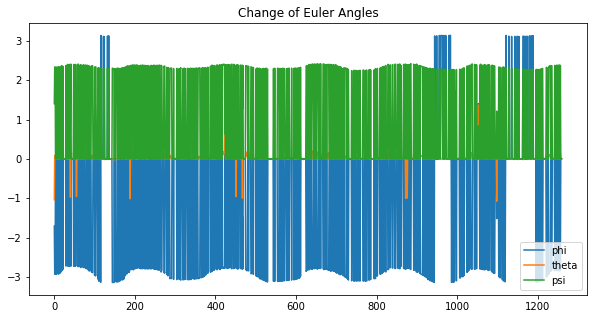

In [16]:
eulers = get_eulers_from_allquaterions(df_quats)
plot_eulers(eulers)